## 1.Importing Needed Libraries to start our task

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## 2.Importing Data and EDA 

In [2]:
Breast_Data ="data.csv"

In [3]:
def wrangle(Breast_Data):
    Breast_Data = pd.read_csv(Breast_Data)
    # Retrieving First 10 Rows
    print(Breast_Data.head(10))
    # Making sure of all types
    print(Breast_Data.info())
    # Making sure of all needed details of data
    print(Breast_Data.describe())
    # Get rid of no-needed columns
    Breast_Data.drop(columns=["id","Unnamed: 32"],inplace=True)
    # Converting Diagonsis to 0 and 1 
    Breast_Data["diagnosis"] = LabelEncoder().fit_transform(Breast_Data["diagnosis"])
    print("Give great look at data ✅")
    print("Checking Data types ✅")
    print("Checking Data details ✅")
    print("Removing no-needed columns ✅")
    print("Converting Target to 0 and 1 ✅")
    return Breast_Data

In [4]:
Breast_Data_Frame = wrangle(Breast_Data=Breast_Data)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

Percent of benign patients: 63%
Percent of malignant patients: 37%


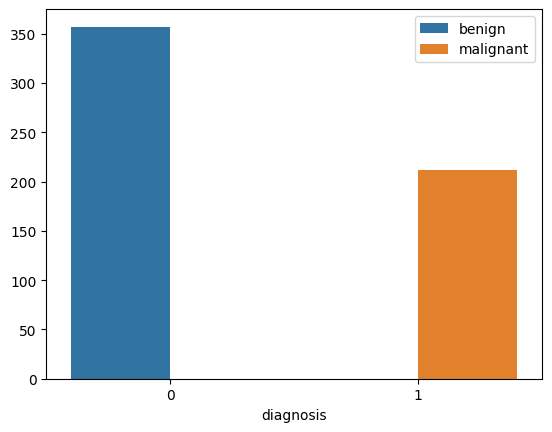

In [5]:
benign_or_malignant = Breast_Data_Frame["diagnosis"].value_counts()
sns.barplot(x=benign_or_malignant.index,y=benign_or_malignant.values,hue= ["benign","malignant"])
print(f"Percent of benign patients: {benign_or_malignant[0] / sum(benign_or_malignant.values) * 100:.0f}%")
print(f"Percent of malignant patients: {benign_or_malignant[1] / sum(benign_or_malignant.values) * 100:.0f}%")

<Axes: >

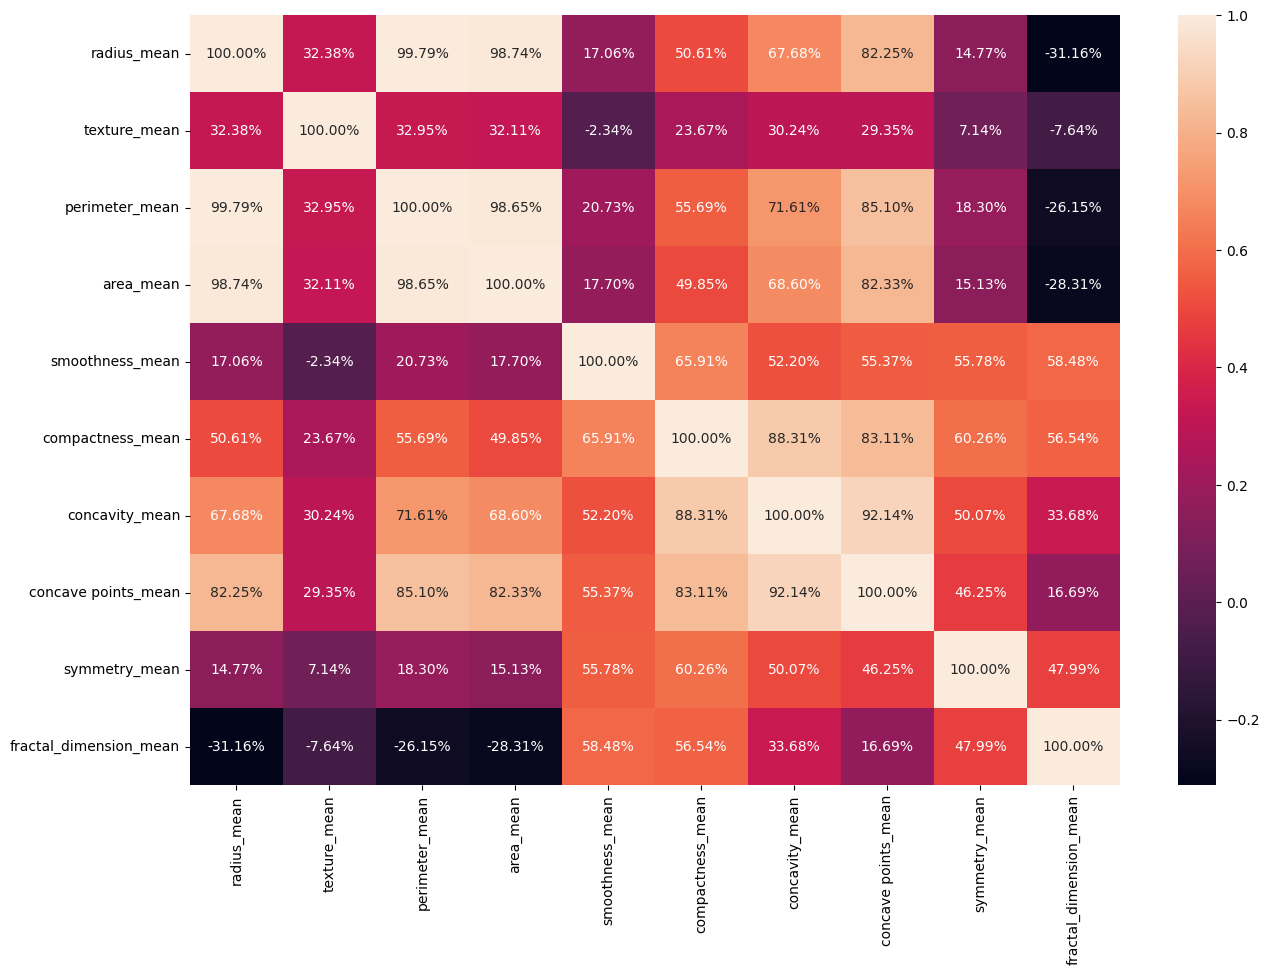

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(Breast_Data_Frame.iloc[:, 1:11].corr(), annot = True,fmt=".2%")

##### I think we can get rid of some data which my depend on other columns in the future

## 3.Feature Enginerring 

In [7]:
shuffled_data = Breast_Data_Frame.sample(frac=1,random_state=42)
features = shuffled_data.drop(columns=["diagnosis"])
target = shuffled_data["diagnosis"]
print(features.shape,target.shape,sep="\n")

(569, 30)
(569,)


In [8]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep="\n")

(455, 30)
(114, 30)
(455,)
(114,)


In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
def Model(X_train, y_train):
    # 1- Logistic Regression
    LR = LogisticRegression(max_iter=1000, random_state=1)
    LR_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  
    LR_grid = GridSearchCV(LR, LR_params, cv=5)
    LR_grid.fit(X_train, y_train)
    best_LR_model = LR_grid.best_estimator_

    # 2- SVM
    SVM = SVC(random_state=7)
    SVM_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}  
    SVM_grid = GridSearchCV(SVM, SVM_params, cv=5)
    SVM_grid.fit(X_train, y_train)
    best_SVM_model = SVM_grid.best_estimator_

    # 3- Decision Tree
    Tree = DecisionTreeClassifier(random_state=7, criterion="entropy")
    Tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]} 
    Tree_grid = GridSearchCV(Tree, Tree_params, cv=5)
    Tree_grid.fit(X_train, y_train)
    best_Tree_model = Tree_grid.best_estimator_

    # 4- Random Forest Classifier
    RFC = RandomForestClassifier(random_state=7, criterion="entropy")
    RFC_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}  
    RFC_grid = GridSearchCV(RFC, RFC_params, cv=5)
    RFC_grid.fit(X_train, y_train)
    best_RFC_model = RFC_grid.best_estimator_

    # Print scores and best parameters for all models
    print(f"Score of Logistic Regression is {LR_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_LR_model}\'")
    print(f"Score of SVM is {SVM_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_SVM_model}\'")
    print(f"Score of Decision Tree is {Tree_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_Tree_model}\'")
    print(f"Score of Random Forest Classifier is {RFC_grid.score(X_train, y_train):0.2%} and best parameters were \'{best_RFC_model}\'")
    
    return best_LR_model, best_SVM_model, best_Tree_model, best_RFC_model


In [11]:
final_LR_model, final_SVM_model, final_Tree_model, final_RFC_model = Model(X_train, y_train)

Score of Logistic Regression is 98.90% and best parameters were 'LogisticRegression(C=1, max_iter=1000, random_state=1)'
Score of SVM is 98.46% and best parameters were 'SVC(C=0.1, kernel='linear', random_state=7)'
Score of Decision Tree is 99.12% and best parameters were 'DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=7)'
Score of Random Forest Classifier is 100.00% and best parameters were 'RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=7)'


In [12]:
def Test_Results(LR, SVM, TRE, RFC, X_test, y_test):
    # 1. LR Model Test Score
    Score_Of_LR = LR.score(X_test, y_test)
    print(f"LR Model Test Score: {Score_Of_LR:0.2%}")

    # 2. SVM Model Test Score
    Score_Of_SVM = SVM.score(X_test, y_test)
    print(f"SVM Model Test Score: {Score_Of_SVM:0.2%}")

    # 3. Decision Tree Model Test Score
    Score_Of_DT = TRE.score(X_test, y_test)
    print(f"Decision Tree Model Test Score: {Score_Of_DT:0.2%}")

    # 4. Random Forest Classifier Model Test Score
    Score_Of_RFC = RFC.score(X_test, y_test)
    print(f"Random Forest Classifier Model Test Score: {Score_Of_RFC:0.2%}")


In [13]:
Test_Results(final_LR_model, final_SVM_model, final_Tree_model, final_RFC_model, X_test, y_test)


LR Model Test Score: 94.74%
SVM Model Test Score: 95.61%
Decision Tree Model Test Score: 93.86%
Random Forest Classifier Model Test Score: 92.98%


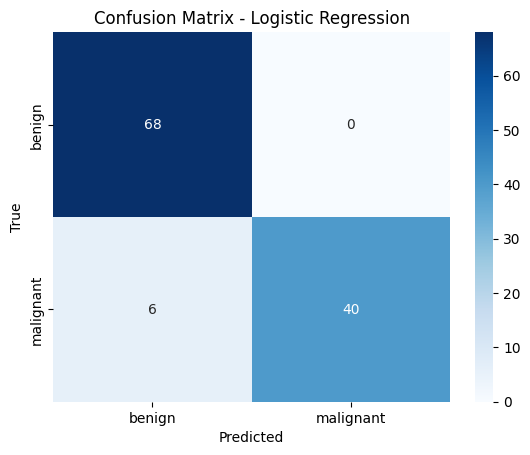

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        68
           1       1.00      0.87      0.93        46

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



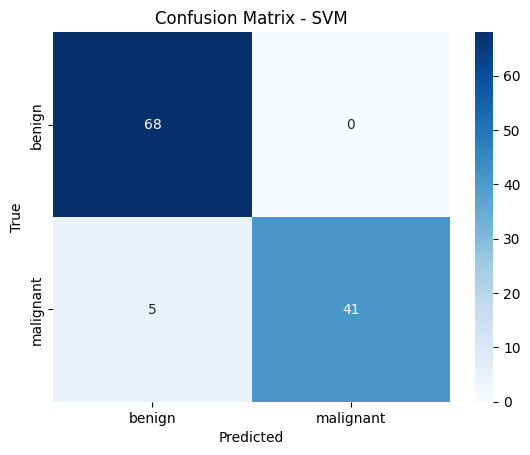

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        68
           1       1.00      0.89      0.94        46

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



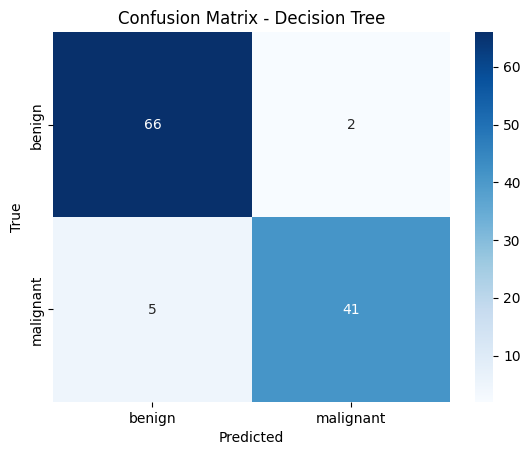

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        68
           1       0.95      0.89      0.92        46

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



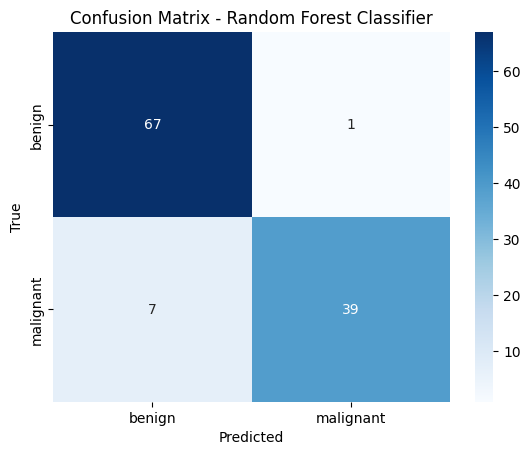

              precision    recall  f1-score   support

           0       0.91      0.99      0.94        68
           1       0.97      0.85      0.91        46

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [14]:
def Classification_Draw(models, X_test, y_test):
    # Define class names
    class_names = ['benign', 'malignant']

    for model, model_name in models:
        # Calculate the confusion matrix
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=True,cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
        print(classification_report(y_test,y_pred))

# Assuming you have a list of models and their names
models = [(final_LR_model, 'Logistic Regression'),
          (final_SVM_model, 'SVM'),
          (final_Tree_model, 'Decision Tree'),
          (final_RFC_model, 'Random Forest Classifier')]

# Call the function to generate confusion matrix plots
Classification_Draw(models, X_test, y_test)


## we are going to focus on decreasing type 1 error which is false positive
### which means that if my patient is malignant and the model says no he is benign, so it's trouble!\
#### Random forest isn't that great sadly, becuase he said that there's 7 people are fine, but it isn't
#### Logistic also detected 6
#### will make compare between Decision tree and SVM, and the error of SVM was lower than Decision treen even in Error 1 detection
## we can take that best model of all was SVM with testing accuracy about 95%

In [15]:
import pickle
# Save the SVM model to a file using pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(final_SVM_model, file)
# Now, your SVM model is saved to a file named 'svm_model.pkl'
